## Data Story Telling

Objective of this exercise is to find some interesting trend and observations. We will analyze the data and see if there are some patterns which comes out individual match or seasons.

## Content

1. Ranking of different teams across seasons
2. Season statistics with Win,Loss,Draw,Goal scored and ranking
3. Goal distribution (Home and Away) - Across season and within season
4. Analysis of team (Home ,Away,Overall) for a season
5. Goal score distribution across season (Home and Away)
6. Match Outcome (Home and Away)
7. Analysis of which season was competitive
8. Analysis of different variable for a match
       8.1 Goal with Distance covered
       8.2 Possession with Goal
       8.3 Possession with Outcome
       8.4 Match formation with outcome
       8.5 Analysis of winning formation for Top5 for all the seasons
9. Comeback analysis by season and team


** Import necessary libraries and set required configurations **

In [1]:
import pandas as pd
import chardet
import collections
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 18)
pd.set_option('display.width', 800)

In [2]:
with open('data/premier_league_data_8seasons-cleaned.tsv', 'rb') as f:
    result = chardet.detect(f.read()) 

In [3]:
df_original=pd.read_csv('data/premier_league_data_8seasons-cleaned.tsv',delimiter='\t',encoding = result['encoding'])

In [4]:
df_completeset_converted = df_original
seasons=df_completeset_converted.seasonlabel.unique()
print (seasons)

['2011/12' '2012/13' '2013/14' '2014/15' '2015/16' '2016/17' '2017/18'
 '2018/19']


** 1. Ranking of different teams across seasons **

In [5]:
def find_common (list1 , list2):
    return list(set(list(list1)+list(list2)))

In [6]:
all_season_ranking = {}
season_ranking={}
standing_by_season_table={}

In [7]:
for season in seasons:
    season_teams=[]
    season_ranking={}
    df_season = df_completeset_converted[df_completeset_converted['seasonlabel']==season]
    season_teams = find_common(df_season.team_h.unique(), df_season.team_a.unique())
    #season_teams = ['Manchester City']
    for season_team in season_teams:
        #print(season_team+'->')
        team_stat={}
        df_team = df_season[(df_season['team_h']==season_team) | (df_season['team_a']==season_team)]
        team_stat['win'] = df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='H')) | ((df_team['team_a']==season_team) & (df_team['matchoutcome']=='A')))].shape[0]
        team_stat['loss'] = df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='A')) | ((df_team['team_a']==season_team) & (df_team['matchoutcome']=='H')))].shape[0]
        team_stat['draw'] = df_team[df_team['matchoutcome']=='D'].shape[0]
        team_stat['GS'] =df_team.loc[(df_season['team_h']==season_team),'score_h'].sum()+df_team.loc[(df_season['team_a']==season_team),'score_a'].sum()
        team_stat['GA'] =df_team.loc[(df_season['team_h']==season_team),'score_a'].sum()+df_team.loc[(df_season['team_a']==season_team),'score_h'].sum()
        team_stat['Point'] = team_stat['win']*3 + team_stat['draw']*1
        team_stat['GoalDiff'] = team_stat['GS'] - team_stat['GA']
        season_ranking[season_team]=team_stat
    season_ranking2=sorted(season_ranking, key=lambda x: (season_ranking[x]['Point'],season_ranking[x]['GoalDiff']),reverse=True)
    all_season_ranking[season]=season_ranking2

In [8]:
df_seasons_table = pd.DataFrame(all_season_ranking)
df_seasons_table

,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19
0,Manchester City,Manchester United,Manchester City,Chelsea,Leicester City,Chelsea,Manchester City,Manchester City
1,Manchester United,Manchester City,Liverpool,Manchester City,Arsenal,Tottenham Hotspur,Manchester United,Liverpool
2,Arsenal,Chelsea,Chelsea,Arsenal,Tottenham Hotspur,Manchester City,Tottenham Hotspur,Chelsea
3,Tottenham Hotspur,Arsenal,Arsenal,Manchester United,Manchester City,Liverpool,Liverpool,Tottenham Hotspur
4,Newcastle United,Tottenham Hotspur,Everton,Tottenham Hotspur,Manchester United,Arsenal,Chelsea,Arsenal
5,Chelsea,Everton,Tottenham Hotspur,Liverpool,Southampton,Manchester United,Arsenal,Manchester United
6,Everton,Liverpool,Manchester United,Southampton,West Ham United,Everton,Burnley,Wolverhampton Wanderers
7,Liverpool,West Bromwich Albion,Southampton,Swansea City,Liverpool,Southampton,Everton,Everton
8,Fulham,Swansea City,Stoke City,Stoke City,Stoke City,AFC Bournemouth,Leicester City,Leicester City
9,Swansea City,West Ham United,Newcastle United,Crystal Palace,Chelsea,West Bromwich Albion,Newcastle United,West Ham United


** 2. Season statistics with Win,Loss,Draw,Goal scored and ranking **

In [9]:
df_team_summary_all_season = pd.DataFrame(columns=['team','seasonlabel','total_game','win','win_h','win_a','draw','draw_h','draw_a','loss','loss_h','loss_a','GS','GA','GD'],index=range(160))

In [10]:
i=0
for season in seasons:
    df_season = df_completeset_converted[df_completeset_converted['seasonlabel']==season]
    season_teams = find_common(df_season.team_h.unique(), df_season.team_a.unique())
    for season_team in season_teams:
        df_team = df_season[(df_season['team_h']==season_team) | (df_season['team_a']==season_team)]
        df_team_summary_all_season.loc[i].team = season_team
        df_team_summary_all_season.loc[i].seasonlabel=season
        df_team_summary_all_season.loc[i].total_game=df_season[(df_season['team_h']==season_team) | (df_season['team_a']==season_team)].shape[0]
        df_team_summary_all_season.loc[i].win=df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='H')) | ((df_team['team_a']==season_team) & (df_team['matchoutcome']=='A')))].shape[0]
        df_team_summary_all_season.loc[i].win_h=df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='H')))].shape[0]
        df_team_summary_all_season.loc[i].win_a = df_team[(((df_team['team_a']==season_team) & (df_team['matchoutcome']=='A')))].shape[0]
        df_team_summary_all_season.loc[i].draw=df_team[df_team['matchoutcome']=='D'].shape[0]
        df_team_summary_all_season.loc[i].draw_h=df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='D')))].shape[0]
        df_team_summary_all_season.loc[i].draw_a=df_team[(((df_team['team_a']==season_team) & (df_team['matchoutcome']=='D')))].shape[0]
        df_team_summary_all_season.loc[i].loss= df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='A')) | ((df_team['team_a']==season_team) & (df_team['matchoutcome']=='H')))].shape[0]
        df_team_summary_all_season.loc[i].loss_h= df_team[(((df_team['team_h']==season_team) & (df_team['matchoutcome']=='A')) )].shape[0]
        df_team_summary_all_season.loc[i].loss_a= df_team[(((df_team['team_a']==season_team) & (df_team['matchoutcome']=='A')) )].shape[0]
        df_team_summary_all_season.loc[i].GS = df_team.loc[(df_season['team_h']==season_team),'score_h'].sum()+df_team.loc[(df_season['team_a']==season_team),'score_a'].sum()
        df_team_summary_all_season.loc[i].GA = df_team.loc[(df_season['team_h']==season_team),'score_a'].sum()+df_team.loc[(df_season['team_a']==season_team),'score_h'].sum()
        df_team_summary_all_season.loc[i].GD = df_team_summary_all_season.loc[i].GS - df_team_summary_all_season.loc[i].GA
        i=i+1
df_team_summary_all_season['Points'] = df_team_summary_all_season['win']*3 + df_team_summary_all_season['draw']*1
cols_sort = ['seasonlabel', 'Points', 'GD','GS']
df_team_summary_all_season=df_team_summary_all_season.sort_values(cols_sort,ascending=[True, False,False,False])
#df_team_summary_all_season['SeasonRank'] =df_team_summary_all_season.sort_values(cols_sort).groupby(cols_sort, sort=False)
#df_team_summary_all_season['SeasonsRank'] = df_team_summary_all_season.groupby('seasonlabel')['Points'].rank(ascending = False, method = 'dense').astype(int)
df_team_summary_all_season['SeasonsRank']=tuple(zip(df_team_summary_all_season.Points,df_team_summary_all_season.GD,df_team_summary_all_season.GS))
df_team_summary_all_season['SeasonsRank']=df_team_summary_all_season.groupby('seasonlabel',sort=False)['SeasonsRank'].apply(lambda x : pd.Series(pd.factorize(x)[0])).values+1
df_team_summary_all_season[df_team_summary_all_season['seasonlabel']=='2011/12']

,team,seasonlabel,total_game,win,win_h,win_a,draw,draw_h,draw_a,loss,loss_h,loss_a,GS,GA,GD,Points,SeasonsRank
8,Manchester City,2011/12,38,28,18,10,5,1,4,5,0,10,93,29,64,89,1
12,Manchester United,2011/12,38,28,15,13,5,2,3,5,2,13,89,33,56,89,2
17,Arsenal,2011/12,38,21,12,9,7,4,3,10,3,9,74,49,25,70,3
0,Tottenham Hotspur,2011/12,38,20,13,7,9,3,6,9,3,7,66,41,25,69,4
3,Newcastle United,2011/12,38,19,11,8,8,5,3,11,3,8,56,51,5,65,5
14,Chelsea,2011/12,38,18,12,6,10,3,7,10,4,6,65,46,19,64,6
18,Everton,2011/12,38,15,10,5,11,3,8,12,6,5,50,40,10,56,7
7,Liverpool,2011/12,38,14,6,8,10,9,1,14,4,8,47,40,7,52,8
4,Fulham,2011/12,38,14,10,4,10,5,5,14,4,4,48,51,-3,52,9
16,West Bromwich Albion,2011/12,38,13,6,7,8,3,5,17,10,7,45,52,-7,47,10


In [11]:
df_team_summary_all_season[df_team_summary_all_season['seasonlabel']=='2018/19']

,team,seasonlabel,total_game,win,win_h,win_a,draw,draw_h,draw_a,loss,loss_h,loss_a,GS,GA,GD,Points,SeasonsRank
158,Manchester City,2018/19,38,32,18,14,2,0,2,4,1,14,95,23,72,98,1
150,Liverpool,2018/19,38,30,17,13,7,2,5,1,0,13,89,22,67,97,2
159,Chelsea,2018/19,38,21,12,9,9,6,3,8,1,9,63,39,24,72,3
141,Tottenham Hotspur,2018/19,38,23,12,11,2,2,0,13,5,11,67,39,28,71,4
156,Arsenal,2018/19,38,21,14,7,7,3,4,10,2,7,73,51,22,70,5
151,Manchester United,2018/19,38,19,10,9,9,6,3,10,3,9,65,54,11,66,6
146,Wolverhampton Wanderers,2018/19,38,16,10,6,9,4,5,13,5,6,47,46,1,57,7
152,Everton,2018/19,38,15,10,5,9,4,5,14,5,5,54,46,8,54,8
154,Leicester City,2018/19,38,15,8,7,7,3,4,16,8,7,51,48,3,52,9
145,West Ham United,2018/19,38,15,9,6,7,4,3,16,6,6,52,55,-3,52,10


** 3.Goal distribution (Home and Away) - Across season and within season **

In [12]:
df_var_by = df_completeset_converted.loc[:,['seasonlabel','gameweeknum','score_h','score_a','tot_dist_m_h','tot_dist_m_a','possession_pct_h','possession_pct_a','matchoutcome','formation_h','formation_a','team_h','team_a','gameid']]
df_var_by['score_total'] = df_var_by['score_h']+df_var_by['score_a']

In [13]:
df_goal_byyear=df_var_by.groupby(['seasonlabel'])[['score_h','score_a','score_total']].sum().reset_index()
df_goal_byyear_summary=df_goal_byyear.rename(columns={"seasonlabel": "Season", "score_h":"HomeGoals","score_a":"AwayGoals","score_total":"TotalGoals" })

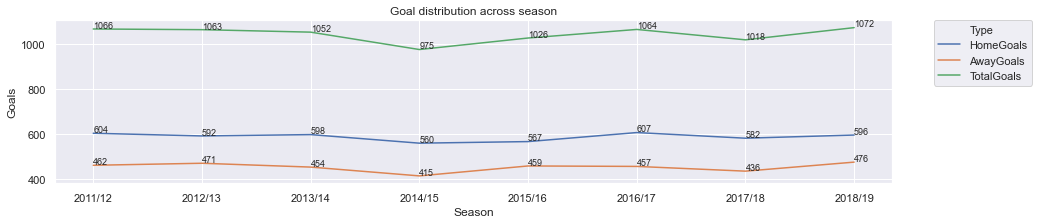

In [14]:
plt.figure(figsize=(15,3))
sns_d1 = pd.melt(frame=df_goal_byyear_summary,id_vars=['Season'],value_vars=['HomeGoals','AwayGoals','TotalGoals'],var_name='Type',value_name='Goals')
sns.set(style='darkgrid')
ax = sns.lineplot(data=sns_d1, x='Season',y='Goals',hue='Type')
ax.set_title('Goal distribution across season')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
slider = 1000
for i in range(sns_d1.shape[0]):
    plt.text(sns_d1.Season.iloc[i],
             sns_d1['Goals'].iloc[i] + 5,
            str(sns_d1['Goals'].iloc[i]),fontsize=9)
plt.show()

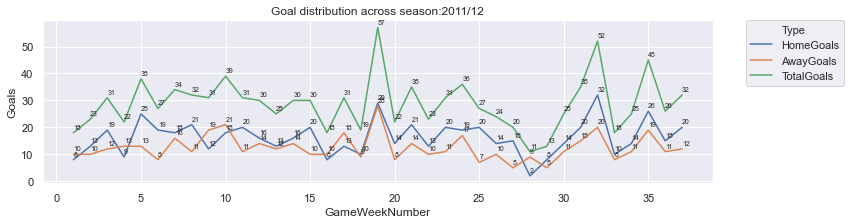

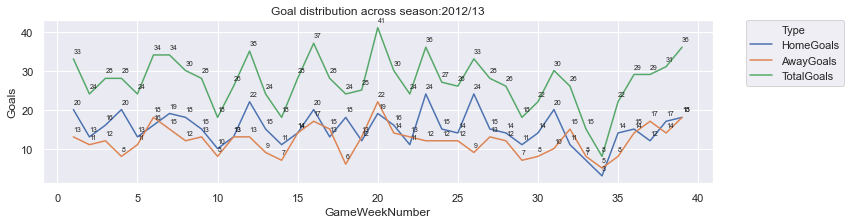

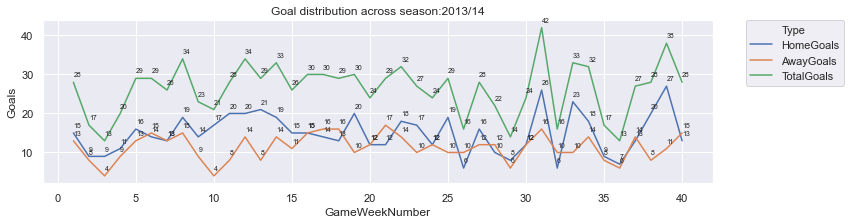

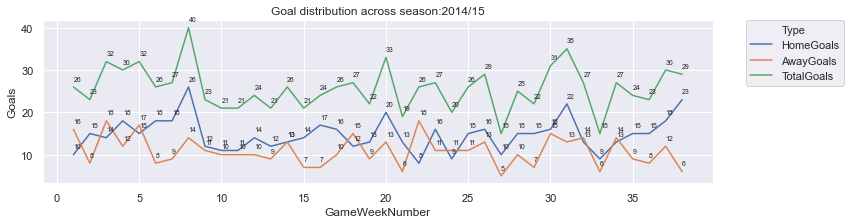

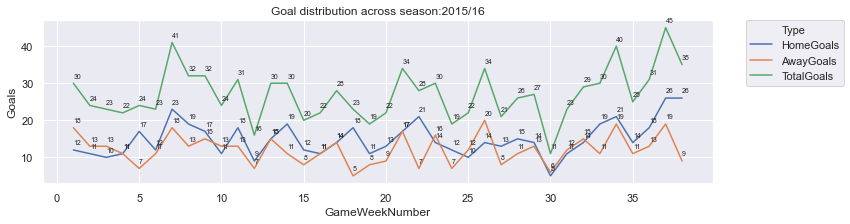

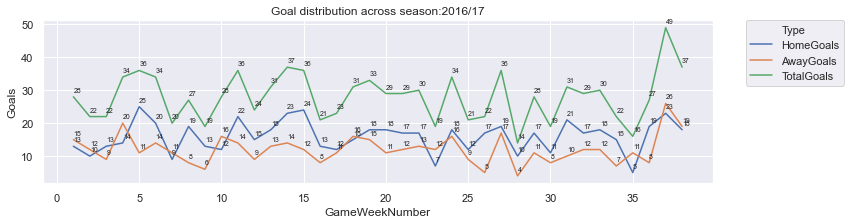

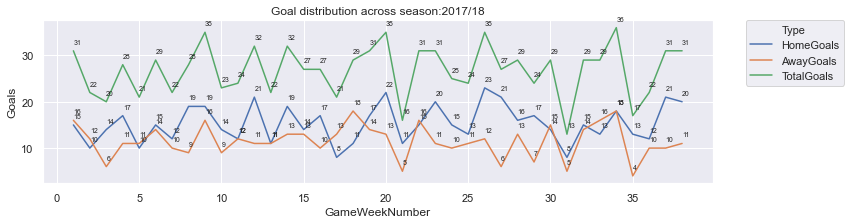

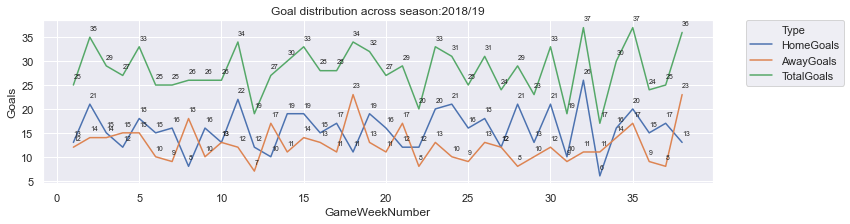

In [15]:
df_goal_byweek_summary=df_var_by.groupby(['seasonlabel','gameweeknum'])[['score_h','score_a','score_total']].sum().reset_index()
df_goal_byweek_summary=df_goal_byweek_summary.rename(columns={"seasonlabel": "Season", "gameweeknum": "GameWeekNumber","score_h":"HomeGoals","score_a":"AwayGoals","score_total":"TotalGoals" })
for season in seasons:
    fig= plt.figure(figsize=(12,3))
    ax = plt.gca()
    df_goal_byweek_season = df_goal_byweek_summary[df_goal_byweek_summary['Season']==season]
    sns_d2 = pd.melt(frame=df_goal_byweek_season,id_vars=['GameWeekNumber'],value_vars=['HomeGoals','AwayGoals','TotalGoals'],var_name='Type',value_name='Goals')
    ax = sns.lineplot(data=sns_d2, x='GameWeekNumber',y='Goals',hue='Type')
    title1= 'Goal distribution across season:'+season
    ax.set_title(title1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    for i in range(sns_d2.shape[0]):
        plt.text(sns_d2.GameWeekNumber.iloc[i],
                 sns_d2['Goals'].iloc[i] + 1.5,
                str(sns_d2['Goals'].iloc[i]),fontsize=7)    
plt.show()

** 4. Analysis of team (Home ,Away,Overall) for a season **

We had picked Everton for this analysis. Everton has been part of premier league since 2011-12 season (never relegated) and has moved up and down the table ranking across season. It will be interesting to see what the match outcome was (away vs home) across different season.
Same analysis can be used for other team in the premier league

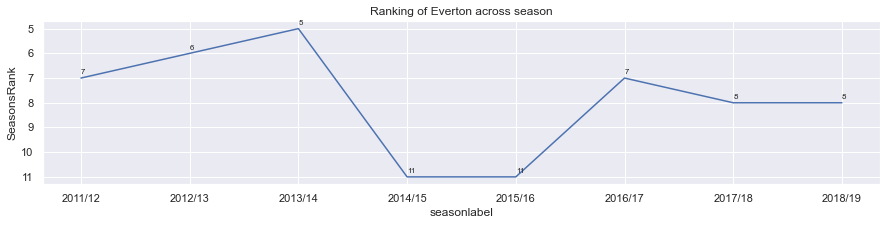

In [16]:
plt.figure(figsize=(15,3))
sns_d3 = df_team_summary_all_season[df_team_summary_all_season['team']=='Everton']
sns.set(style='darkgrid')
ax = sns.lineplot(data=sns_d3, x='seasonlabel',y='SeasonsRank')
ax.set_title('Ranking of Everton across season')
plt.ylim(reversed(plt.ylim()))
for i in range(sns_d3.shape[0]):
    plt.text(sns_d3['seasonlabel'].iloc[i],
                     sns_d3['SeasonsRank'].iloc[i]-0.15 ,
                    str(sns_d3['SeasonsRank'].iloc[i]),fontsize=8)
plt.show()

Team: Everton
Analysis for season:2011/12


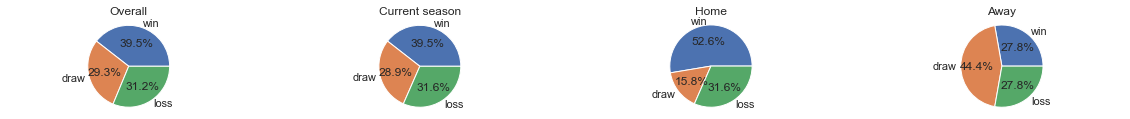

Analysis for season:2012/13


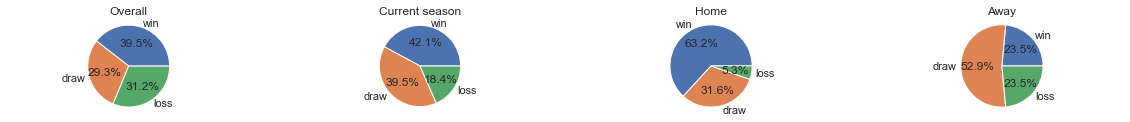

Analysis for season:2013/14


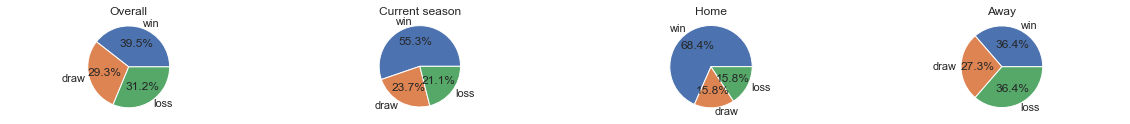

Analysis for season:2014/15


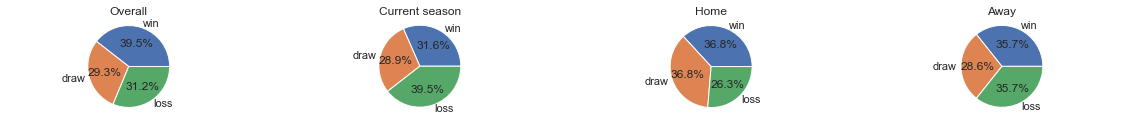

Analysis for season:2015/16


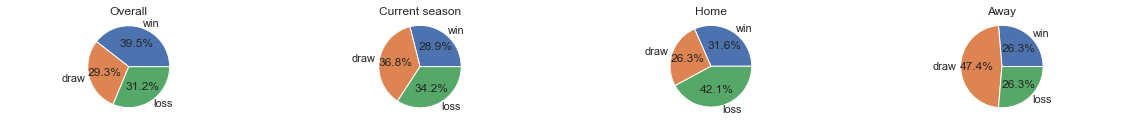

Analysis for season:2016/17


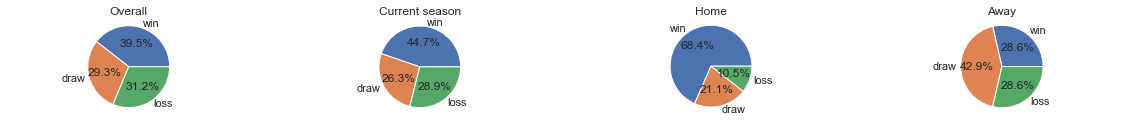

Analysis for season:2017/18


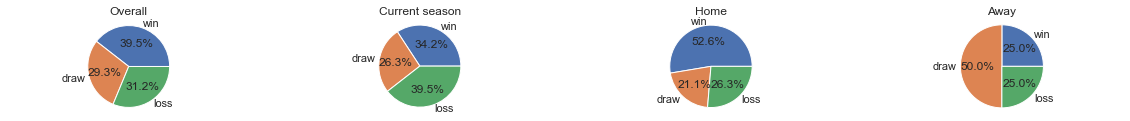

Analysis for season:2018/19


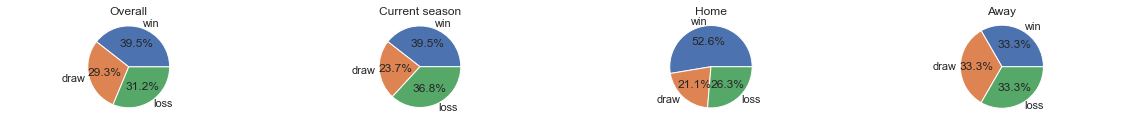

In [17]:
labels = 'win', 'draw', 'loss'
ch_title_win_loss = {0:"Overall",1:"Current season",2:"Home",3:"Away"}
df_team_summary_all_season_Ev = df_team_summary_all_season[(df_team_summary_all_season['team']=='Everton')]
print ('Team:' , 'Everton')
for season in seasons:
    print ('Analysis for season:'+season)
    
    df_t1= df_team_summary_all_season_Ev[df_team_summary_all_season_Ev['seasonlabel']==season]
    rowidx = df_t1.shape[0]
    #print('rowindex='+str(rowidx))
    for row in range (0,rowidx):
        t2 = df_t1['team'].iloc[row]
        #print('t2='+t2)
        df_t2 = df_t1[df_t1['team']==t2]
        df_t2_o= df_team_summary_all_season_Ev[df_team_summary_all_season_Ev['team']==t2]
        #print ('Team Name:'+t2)
        fig = plt.figure(figsize=(20, 40))
        for column in range (0,4):
            #print ('here1')
            ax1 = plt.subplot2grid((20,4),(row,column))
            #print (column)
            if (column==0):
                sizes = [df_t2_o['win'].sum(),df_t2_o['draw'].sum(),df_t2_o['loss'].sum()]
            elif (column==1):
                sizes = [df_t2['win'].iloc[0],df_t2['draw'].iloc[0],df_t2['loss'].iloc[0]]
            elif (column==2):
                sizes = [df_t2['win_h'].iloc[0],df_t2['draw_h'].iloc[0],df_t2['loss_h'].iloc[0]]
            else:
                sizes = [df_t2['win_a'].iloc[0],df_t2['draw_a'].iloc[0],df_t2['loss_a'].iloc[0]]
            #print (sizes)
            plt.pie(sizes,labels=labels,autopct='%1.1f%%')
            plt.axis('equal')
            #print ('here4')
            plt.title(ch_title_win_loss[column])
        plt.show()

** 5. Goal score distribution across season (Home and Away)**

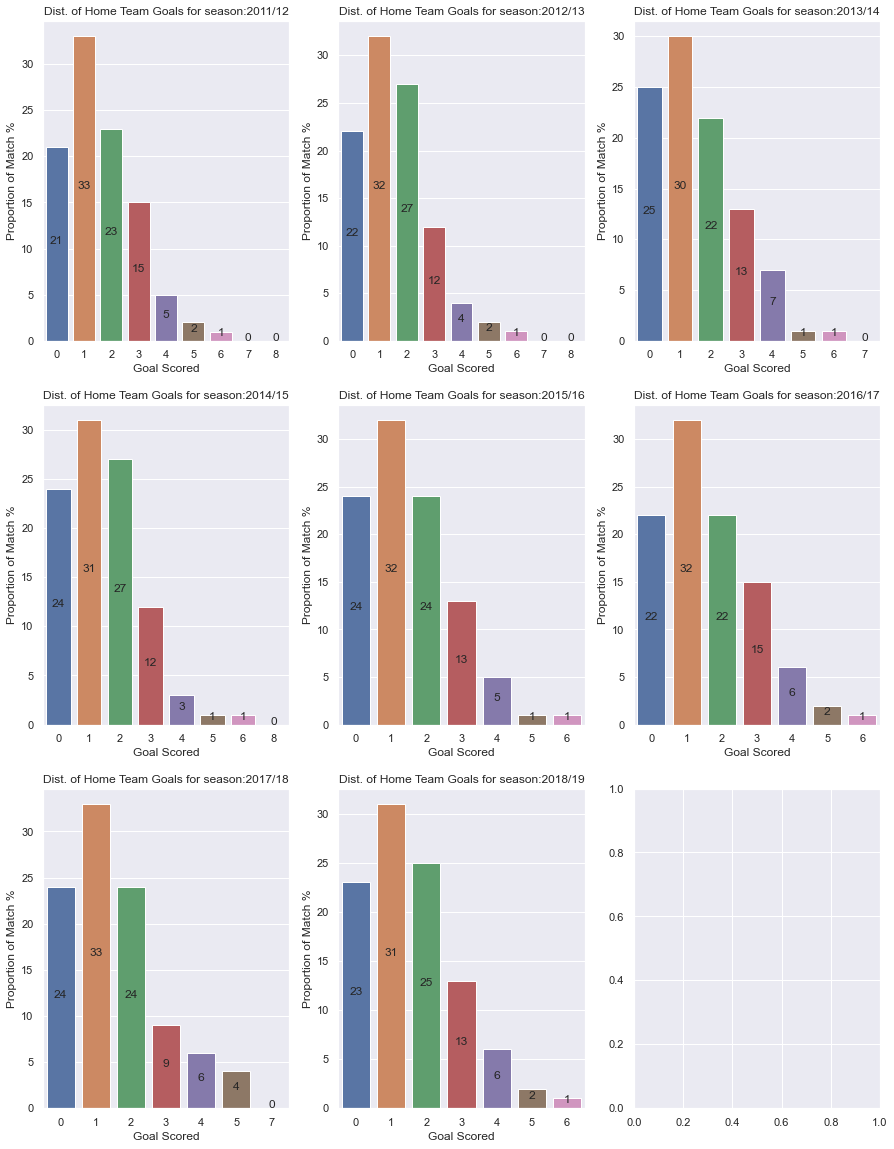

In [18]:
unique_score_home = list(df_var_by.score_h.unique())
fig, axes = plt.subplots(ncols=3, nrows=3,figsize=(15, 20))
df_t5 = df_var_by.groupby(['seasonlabel','score_h'])['gameweeknum'].count().reset_index()
df_t5 = df_t5.rename(columns={"gameweeknum":"CountofMatch"})
df_t5['totalMatch'] = df_t5.groupby(['seasonlabel'])['CountofMatch'].transform('sum')  
df_t5['ProportionofMatch'] = round(df_t5['CountofMatch']/df_t5['totalMatch'],2)*100
i1=0 
j1=0
for season in seasons:
    df_t55= df_t5[df_t5['seasonlabel']==season]
    ax1=sns.barplot(x='score_h', y='ProportionofMatch',data=df_t55,ax=axes[i1][j1])
    ax1.set_title("Dist. of Home Team Goals for season:"+season)
    ax1.set(xlabel='Goal Scored', ylabel='Proportion of Match %')
    j1=j1+1
    if (j1==3):
        j1=0
        i1=i1+1
    for p in ax1.patches:
        width = p.get_width()
        ax1.text(p.get_x()+p.get_width()/2. ,p.get_height()/2,'{:.0f}'.format(round(p.get_height(),0)), ha="center")        
plt.show()

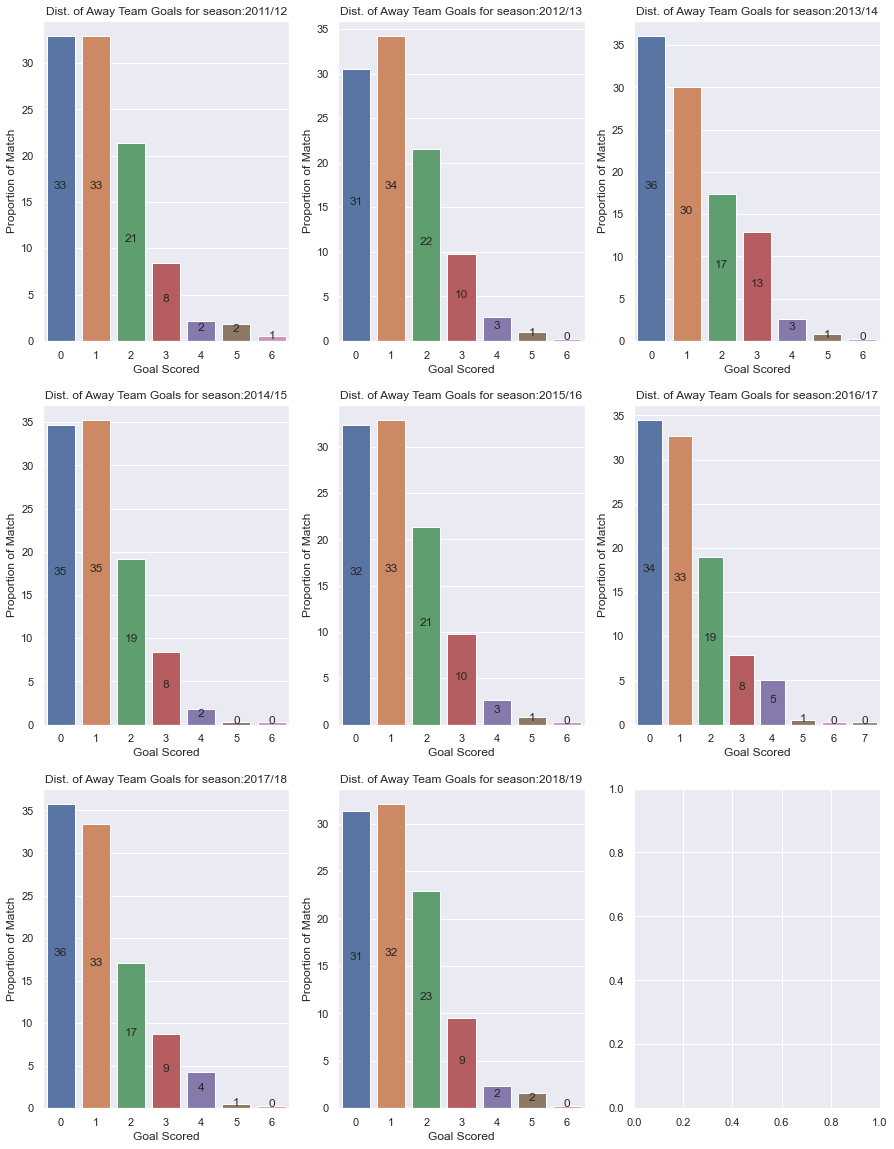

In [19]:
fig, axes = plt.subplots(ncols=3, nrows=3,figsize=(15, 20))
df_t6 = df_var_by.groupby(['seasonlabel','score_a'])['gameweeknum'].count().reset_index()
df_t6 = df_t6.rename(columns={"gameweeknum":"CountofMatch"})
df_t6['totalMatch'] = df_t6.groupby(['seasonlabel'])['CountofMatch'].transform('sum')  
df_t6['ProportionofMatch'] = round(df_t6['CountofMatch']*100/df_t6['totalMatch'],2)
i1=0 
j1=0
for season in seasons:
    df_t66= df_t6[df_t6['seasonlabel']==season]
    ax1=sns.barplot(x='score_a', y='ProportionofMatch',data=df_t66,ax=axes[i1][j1])
    ax1.set_title("Dist. of Away Team Goals for season:"+season)
    ax1.set(xlabel='Goal Scored', ylabel='Proportion of Match')
    j1=j1+1
    if (j1==3):
        j1=0
        i1=i1+1  
    for p in ax1.patches:
        width = p.get_width()
        ax1.text(p.get_x()+p.get_width()/2. ,p.get_height()/2,'{:.0f}'.format(round(p.get_height(),0)), ha="center")       
plt.show()

** 6. Match Outcome (Home and Away)**

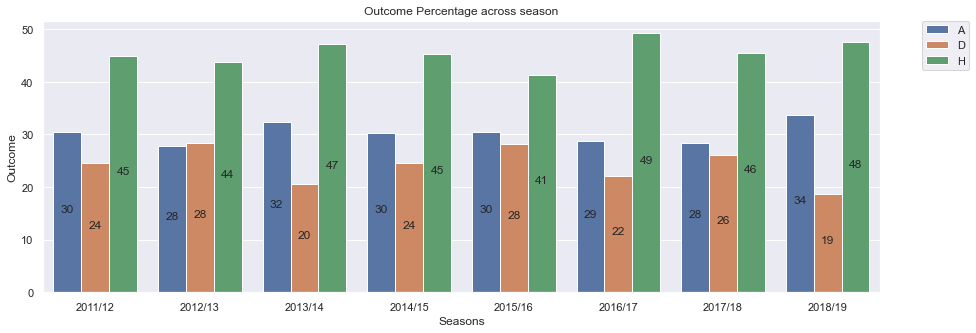

In [20]:
plt.figure(figsize=(15,5))
df_t3= df_var_by.groupby(['seasonlabel','matchoutcome'])['gameweeknum'].count().reset_index()
df_t3=df_t3.rename(columns={"gameweeknum": "matchcount"})
df_t3['total'] = df_t3.groupby(['seasonlabel'])['matchcount'].transform('sum')   
df_t3['OutcomePct']  = round((df_t3['matchcount'] / df_t3['total'])*100,1)
ax = sns.barplot(data=df_t3, x='seasonlabel',y='OutcomePct',hue='matchoutcome')
ax.set_title('Outcome Percentage across season')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xlabel='Seasons', ylabel='Outcome')
for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_x()+p.get_width()/2. ,p.get_height()/2,'{:.0f}'.format(round(p.get_height(),0)), ha="center")
plt.show()

** 7. Analysis of which season was competitive **

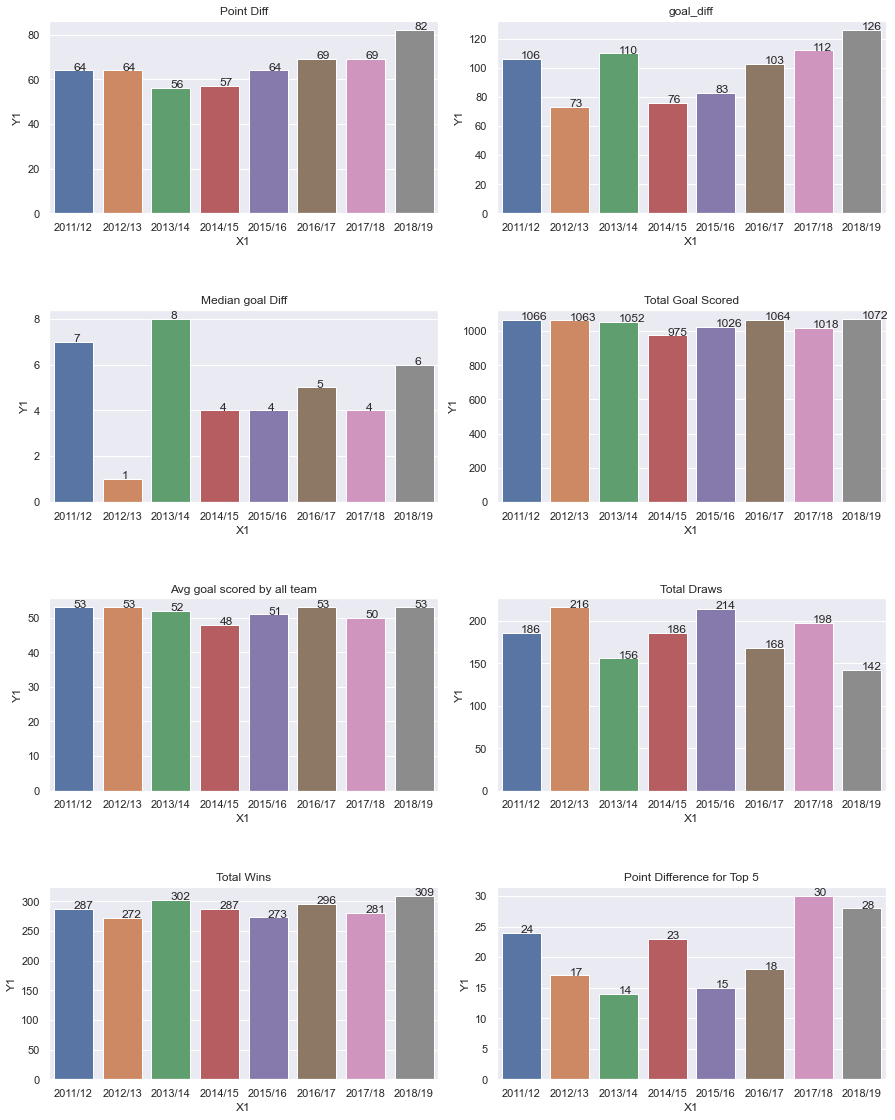

In [21]:
point_diff = {}
goal_diff ={}
median_goal_diff = {}
total_goal_scored = {}
avg_goal_scored = {}
total_draws ={}
total_wins={}
point_diff_t5={}
for season in seasons:
    df_t7 = df_team_summary_all_season[df_team_summary_all_season['seasonlabel']==season]
    point_diff[season]=df_t7['Points'].max() - df_t7['Points'].min()
    goal_diff[season]=df_t7['GD'].max() - df_t7['GD'].min()
    median_goal_diff[season] = (int)(df_t7['GD'].diff(-1).median())
    total_goal_scored[season] = df_t7['GS'].sum()
    avg_goal_scored[season] = (int)(df_t7['GS'].mean())
    total_draws[season] = df_t7['draw'].sum()
    total_wins[season] = df_t7['win'].sum()
    point_diff_t5[season] = df_t7[df_t7['SeasonsRank']==1]['Points'].sum()-df_t7[df_t7['SeasonsRank']==5]['Points'].sum()
plot_dict={"0-0":"Point Diff","0-1":"goal_diff","1-0":"Median goal Diff","1-1":"Total Goal Scored","2-0":"Avg goal scored by all team","2-1":"Total Draws","3-0":"Total Wins","3-1":"Point Difference for Top 5"}
rows=3
cols=2
fig, axarr = plt.subplots(4, 2, figsize=(15, 15))
dictkeys=point_diff_t5.keys()
dictvals =point_diff_t5.values()
#plt.bar(range(len(point_diff)), list(point_diff.values()), align='center')
for row in range(0,4):
    for col in range(0,2):
        #print('before:'+str(row)+'-'+str(col))
        if ((str(row)+'-'+str(col))=='0-0'):
            dictkeys=point_diff.keys()
            dictvals =point_diff.values()
        elif ((str(row)+'-'+str(col))=='0-1'):
            dictkeys=goal_diff.keys()
            dictvals =goal_diff.values()
        elif ((str(row)+'-'+str(col))=='1-0'):
            dictkeys=median_goal_diff.keys()
            dictvals =median_goal_diff.values()
        elif ((str(row)+'-'+str(col))=='1-1'):
            dictkeys=total_goal_scored.keys()
            dictvals =total_goal_scored.values()
        elif((str(row)+'-'+str(col))=='2-0'):
            dictkeys=avg_goal_scored.keys()
            dictvals =avg_goal_scored.values()
        elif((str(row)+'-'+str(col))=='2-1'):
            dictkeys=total_draws.keys()
            dictvals =total_draws.values()
        elif((str(row)+'-'+str(col))=='3-0'):
            dictkeys=total_wins.keys()
            dictvals =total_wins.values()
        elif((str(row)+'-'+str(col))=='3-1'):
            dictkeys=point_diff_t5.keys()
            dictvals =point_diff_t5.values()            
        df_sc7 = pd.DataFrame(list(zip(range(len(dictkeys)),list(dictvals))) ,columns =['X1', 'Y1'] )
        #axarr[row][col].bar(range(len(dictkeys)), list(dictvals), width=0.4, align='center')
        ax1=sns.barplot(x='X1', y='Y1', data=df_sc7,ax=axarr[row][col])
        #ax1=sns.barplot(x='score_a', y='ProportionofMatch',data=df_t66,ax=axes[i1][j1])
        #x = np.arange(len(dictkeys))
        #axarr[row][col].set_xticks(x)
        axarr[row][col].set_xticklabels(dictkeys)
        axarr[row][col].set_title(plot_dict[str(row)+'-'+str(col)])
        #rect=axarr[row][col].patches
        #print(rect.get_x())
        for i, v in enumerate(dictvals):
            axarr[row][col].text(i , v, str(v))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.15)
plt.show()

** 8.Analysis of different variable for a match **




** 8.1 Goal with Distance covered**

In [22]:
df_var_by['distance_total'] = df_var_by['tot_dist_m_h']+df_var_by['tot_dist_m_a']

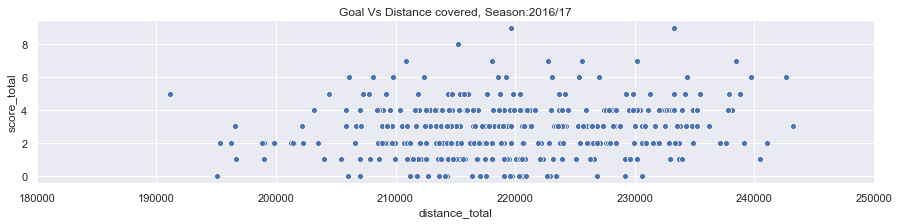

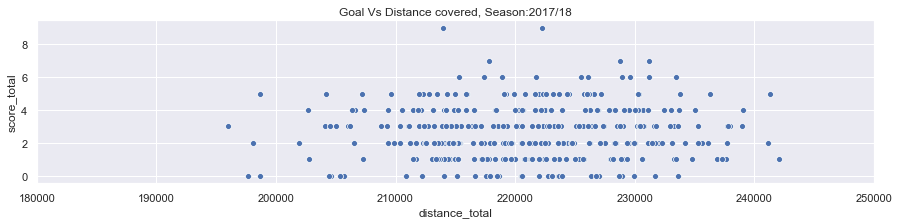

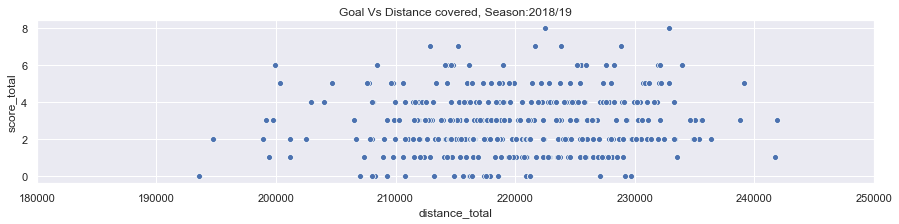

In [23]:
for season in seasons[5:]:
    fig1= plt.figure(figsize=(15,3))
    ax1 = plt.gca()
    #max_goal_week = df_var_byweek['score_total'].max()
    df_d1 = df_var_by[df_var_by['seasonlabel'] == season ]
    #min_dist = d1['distance_total'].min()
    #plt.scatter(df_var_byweek.distance_total,df_var_byweek.score_total)
    ax1 = sns.scatterplot(x='distance_total',y='score_total',data=df_d1)
    ax1.set_title('Goal Vs Distance covered, Season:'+season)
    ax1.set_xlim(180000,250000)
plt.show()

** 8.2 Possession with Goal **

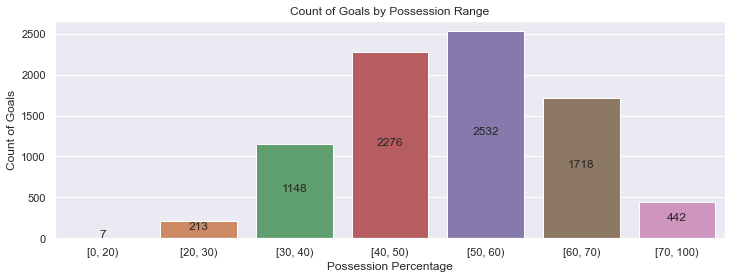

In [24]:
df_pwg1 = df_var_by[['seasonlabel','possession_pct_h','score_h','matchoutcome']].rename(columns={"possession_pct_h": "possession_pct", "score_h":"Goals","matchoutcome":"matchoutcome2"})
df_pwg1['matchoutcome'] = df_pwg1['matchoutcome2'].apply(lambda row: 'Win' if row=='H' else('Loss' if row=='A' else 'Draw'))
df_pwg2 = df_var_by[['seasonlabel','possession_pct_a','score_a','matchoutcome']].rename(columns={"possession_pct_a": "possession_pct", "score_a":"Goals","matchoutcome":"matchoutcome2"})
df_pwg2['matchoutcome'] = df_pwg2['matchoutcome2'].apply(lambda row: 'Win' if row=='H' else('Loss' if row=='A' else 'Draw'))
df_pwg = pd.concat([df_pwg1,df_pwg2])
ranges_p = [0,20,30,40,50,60,70,100]
ranges_g = [0,1,2,4,15]
df_pwg4 = df_pwg.groupby([pd.cut(df_pwg.possession_pct, ranges_p,right=False)])['Goals'].agg('sum').fillna(0).astype(int).reset_index(name='CountOfGoals')
plt.figure(figsize=(12,4))
ax = sns.barplot(data=df_pwg4, x='possession_pct',y='CountOfGoals')
ax.set_title('Count of Goals by Possession Range')
ax.set(xlabel='Possession Percentage', ylabel='Count of Goals')
for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_x()+p.get_width()/2. ,p.get_height()/2,'{:.0f}'.format(round(p.get_height(),0)), ha="center")
plt.show()

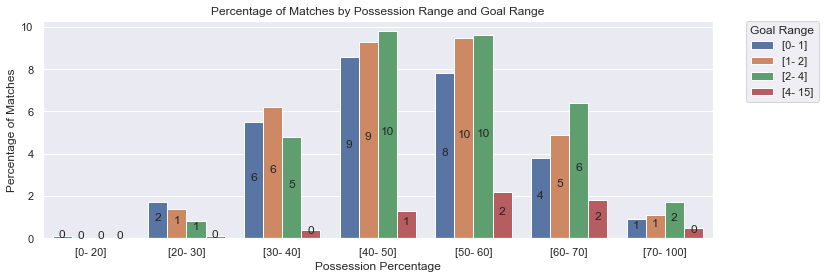

In [25]:
df_pwg2 = df_pwg.groupby([pd.cut(df_pwg.Goals, ranges_g,right=False),'possession_pct'])['Goals'].count().reset_index(name='count')
df_pwg3 = df_pwg2.groupby([pd.cut(df_pwg2.possession_pct, ranges_p,right=False),'Goals'])['count'].agg( 'sum').fillna(0).groupby(level=0).apply(lambda x:round(100 * x / float(6080),1)).reset_index(name='Percent')
df_pwg3[['possession_pct','Goals']]= df_pwg3[['possession_pct','Goals']].astype(str)
df_pwg3['possession_pct']=df_pwg3['possession_pct'].str.replace(')',']')
df_pwg3['possession_pct']=df_pwg3['possession_pct'].str.replace(',','-')
df_pwg3['Goals']=df_pwg3['Goals'].str.replace(')',']')
df_pwg3['Goals']=df_pwg3['Goals'].str.replace(',','-')

plt.figure(figsize=(12,4))
ax = sns.barplot(data=df_pwg3, x='possession_pct',y='Percent',hue='Goals')
ax.set_title('Percentage of Matches by Possession Range and Goal Range')
plt.legend(bbox_to_anchor=(1.05, 1), title ="Goal Range",loc=2, borderaxespad=0.)
ax.set(xlabel='Possession Percentage', ylabel='Percentage of Matches')
for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_x()+p.get_width()/2. ,p.get_height()/2,'{:.0f}'.format(round(p.get_height(),0)), ha="center")
plt.show()

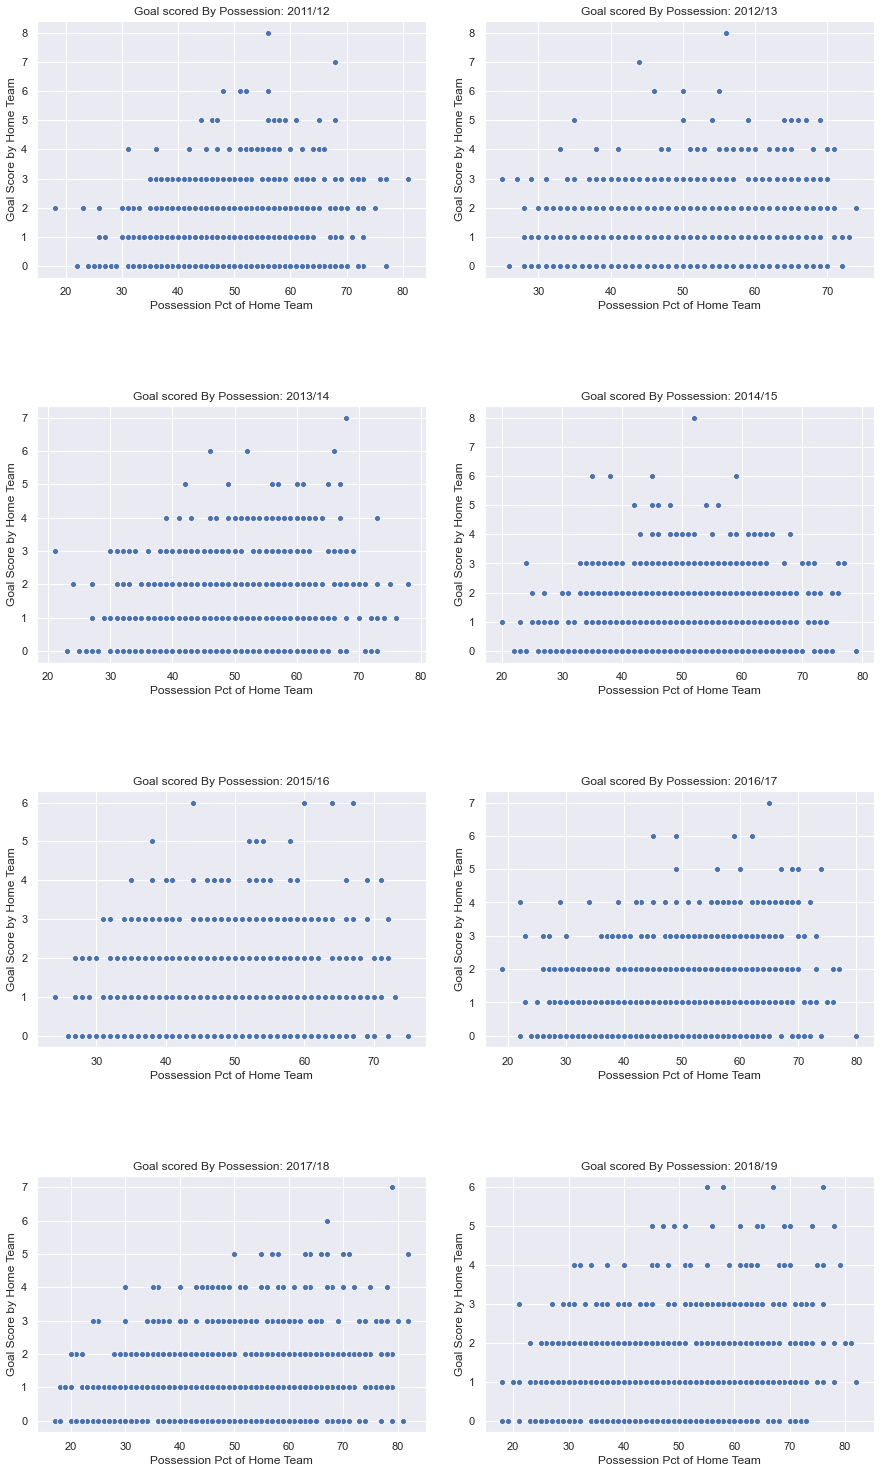

In [26]:
fig, axes = plt.subplots(ncols=2, nrows=4,figsize=(15, 20))
i1=0 
j1=0
for season in seasons:
    df_pwg_s = df_pwg[df_pwg['seasonlabel'] == season]
    ax1=sns.scatterplot(x='possession_pct', y='Goals', data=df_pwg_s,ax=axes[i1][j1])
    ax1.set_title('Goal scored By Possession: '+season)
    ax1.set(xlabel='Possession Pct of Home Team', ylabel='Goal Score by Home Team')
    j1=j1+1
    if (j1==2):
        j1=0
        i1=i1+1     
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.15)
plt.show()

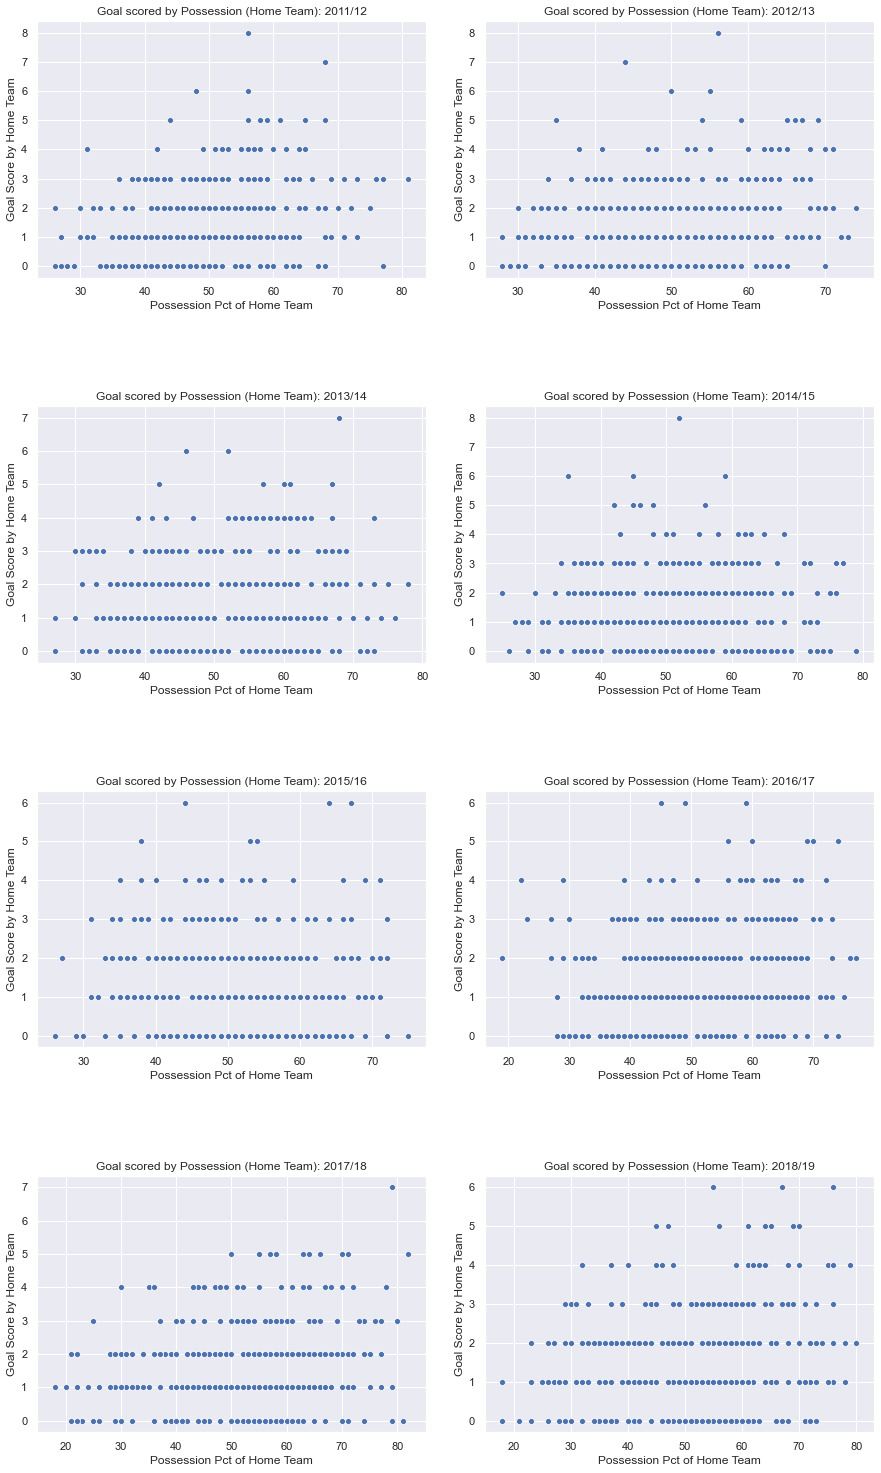

In [27]:
fig, axes = plt.subplots(ncols=2, nrows=4,figsize=(15, 20))
palette ={"H":"C0","D":"C1","A":"C2"}
i1=0 
j1=0
for season in seasons:
    df_d2 = df_var_by[df_var_by['seasonlabel'] == season ]
    ax1=sns.scatterplot(x='possession_pct_h', y='score_h', data=df_d2,ax=axes[i1][j1],palette=palette)
    ax1.set_title('Goal scored by Possession (Home Team): '+season)
    ax1.set(xlabel='Possession Pct of Home Team', ylabel='Goal Score by Home Team')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    j1=j1+1
    if (j1==2):
        j1=0
        i1=i1+1    
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.15)
plt.show()

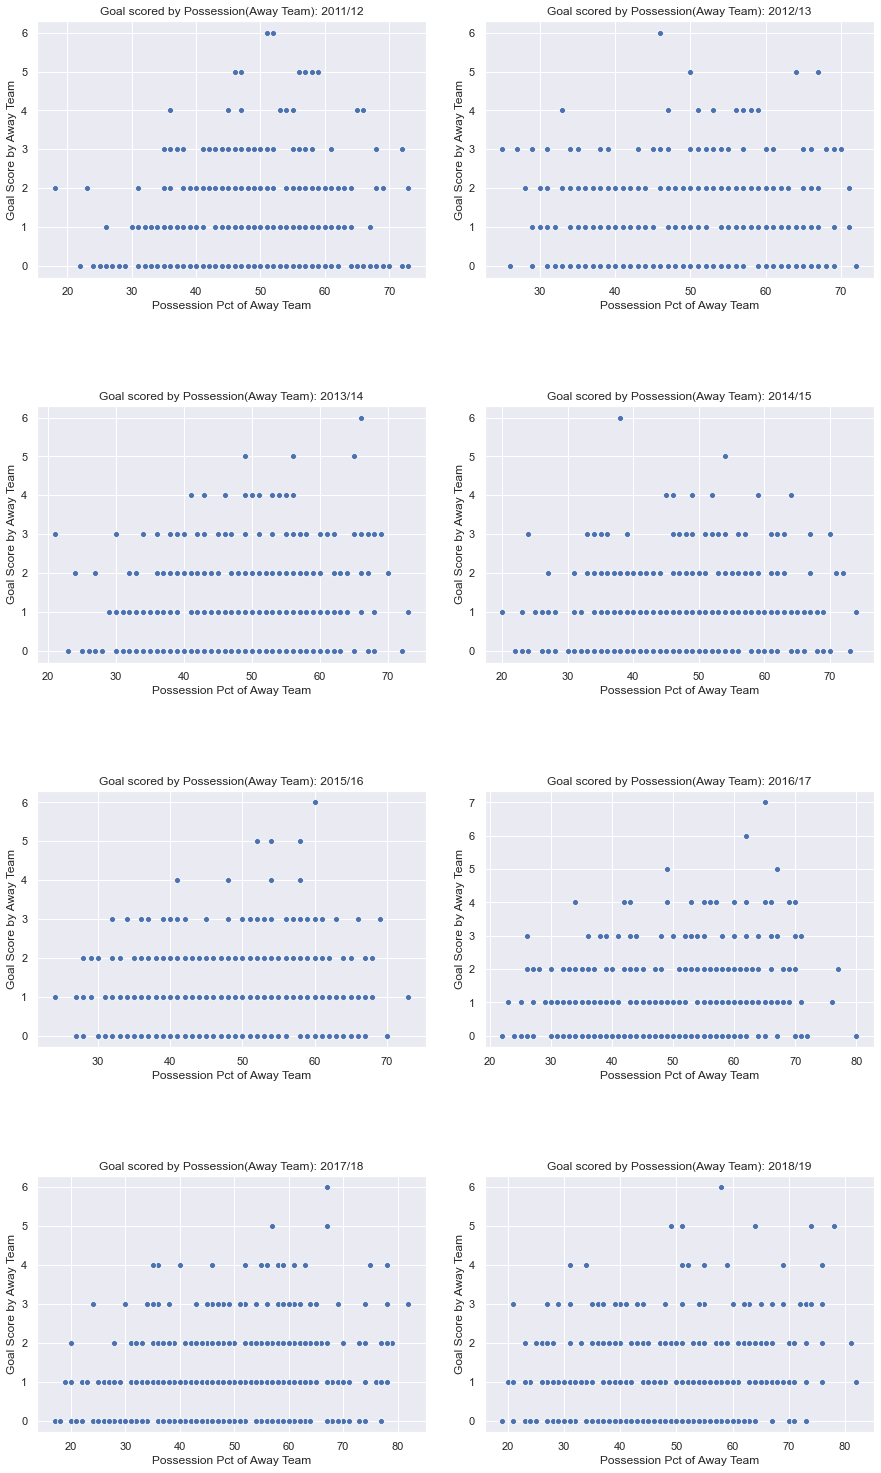

In [28]:
fig, axes = plt.subplots(ncols=2, nrows=4,figsize=(15, 20))
i1=0 
j1=0
for season in seasons:
    df_d2 = df_var_by[df_var_by['seasonlabel'] == season ]
    ax1=sns.scatterplot(x='possession_pct_a', y='score_a', data=df_d2,ax=axes[i1][j1])
    ax1.set_title('Goal scored by Possession(Away Team): '+season)
    ax1.set(xlabel='Possession Pct of Away Team', ylabel='Goal Score by Away Team')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    j1=j1+1
    if (j1==2):
        j1=0
        i1=i1+1    
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.15)
plt.show()

** 8.3 Possession with Outcome **

In [29]:
df_poss_outcome = df_var_by[['seasonlabel','score_h','score_a','possession_pct_h','possession_pct_a','matchoutcome']]
df_poss_outcome2= df_poss_outcome[(df_poss_outcome['matchoutcome']=='H') | (df_poss_outcome['matchoutcome']=='A')]
df_poss_outcome2['PossessionPctWin'] = np.where(df_poss_outcome2['matchoutcome'] == 'H',df_poss_outcome2['possession_pct_h'],df_poss_outcome2['possession_pct_a'])
df_poss_outcome2['PossessionPctLoss'] = np.where(df_poss_outcome2['matchoutcome'] == 'H',df_poss_outcome2['possession_pct_a'],df_poss_outcome2['possession_pct_h'])

C:\Users\deept\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\deept\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


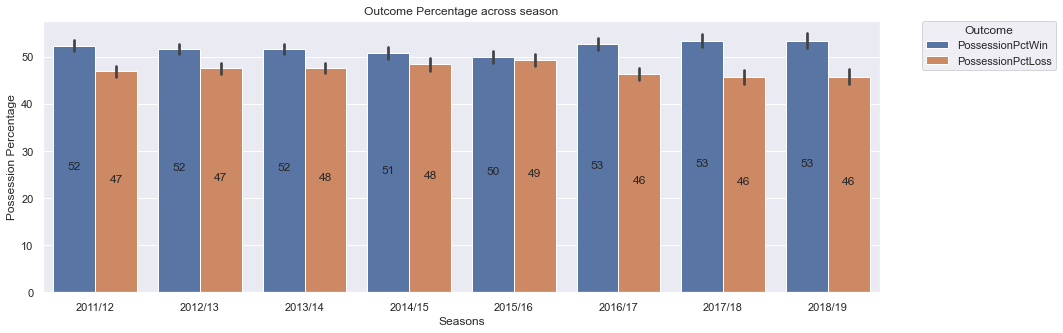

In [30]:
sns_d4 = pd.melt(frame=df_poss_outcome2,id_vars=['seasonlabel'],value_vars=['PossessionPctWin','PossessionPctLoss'],var_name='Type',value_name='PossessionPct')
plt.figure(figsize=(15,5))
ax = sns.barplot(data=sns_d4, x='seasonlabel',y='PossessionPct',hue='Type')
ax.set_title('Outcome Percentage across season')
plt.legend(bbox_to_anchor=(1.05, 1),  title ="Outcome",loc=2, borderaxespad=0.)
ax.set(xlabel='Seasons', ylabel='Possession Percentage')
#for index, row in sns_d4.iterrows():
    #ax.text(row.name,row.PossessionPct, round(row.PossessionPct,2), color='black', ha="center")
for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_x()+p.get_width()/2. ,p.get_height()/2,'{:.0f}'.format(round(p.get_height(),0)), ha="center")    
plt.show()

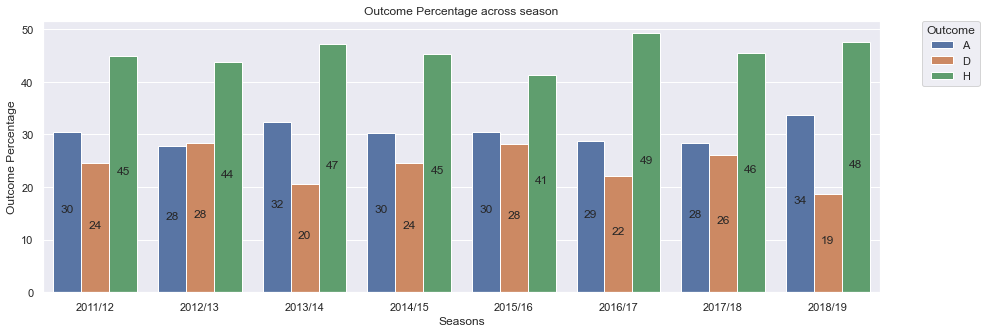

In [31]:
plt.figure(figsize=(15,5))
df_t3= df_var_by.groupby(['seasonlabel','matchoutcome'])['gameweeknum'].count().reset_index()
df_t3=df_t3.rename(columns={"gameweeknum": "matchcount"})
df_t3['total'] = df_t3.groupby(['seasonlabel'])['matchcount'].transform('sum')   
df_t3['OutcomePct']  = round((df_t3['matchcount'] / df_t3['total'])*100,1)
ax = sns.barplot(data=df_t3, x='seasonlabel',y='OutcomePct',hue='matchoutcome')
ax.set_title('Outcome Percentage across season')
plt.legend(bbox_to_anchor=(1.05, 1), title='Outcome', loc=2, borderaxespad=0.)
ax.set(xlabel='Seasons', ylabel='Outcome Percentage')
for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_x()+p.get_width()/2. ,p.get_height()/2,'{:.0f}'.format(round(p.get_height(),0)), ha="center")
plt.show()

** 8.4 Match formation with outcome **

C:\Users\deept\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


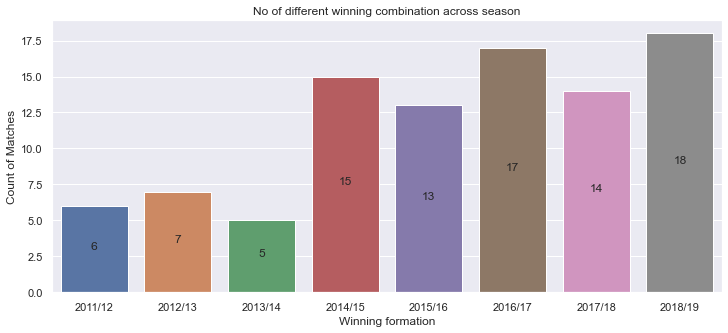

In [32]:
df_t8 = df_var_by[(df_var_by['matchoutcome']=='H') | (df_var_by['matchoutcome']=='A')]
df_t8['winformation']= np.where(df_t8['matchoutcome']=='H',df_t8['formation_h'],df_t8['formation_a'] )
df_winf_ct = df_t8.groupby('seasonlabel')['winformation'].nunique().reset_index(name='count_formation')
plt.figure(figsize=(12,5))
ax1=sns.barplot(x='seasonlabel', y='count_formation', data=df_winf_ct)
ax1.set_title('No of different winning combination across season')
ax1.set(xlabel='Winning formation', ylabel='Count of Matches')
for p in ax1.patches:
    width = p.get_width()
    ax1.text(p.get_x()+p.get_width()/2. ,p.get_height()/2,'{:.0f}'.format(round(p.get_height(),0)), ha="center")
plt.show()

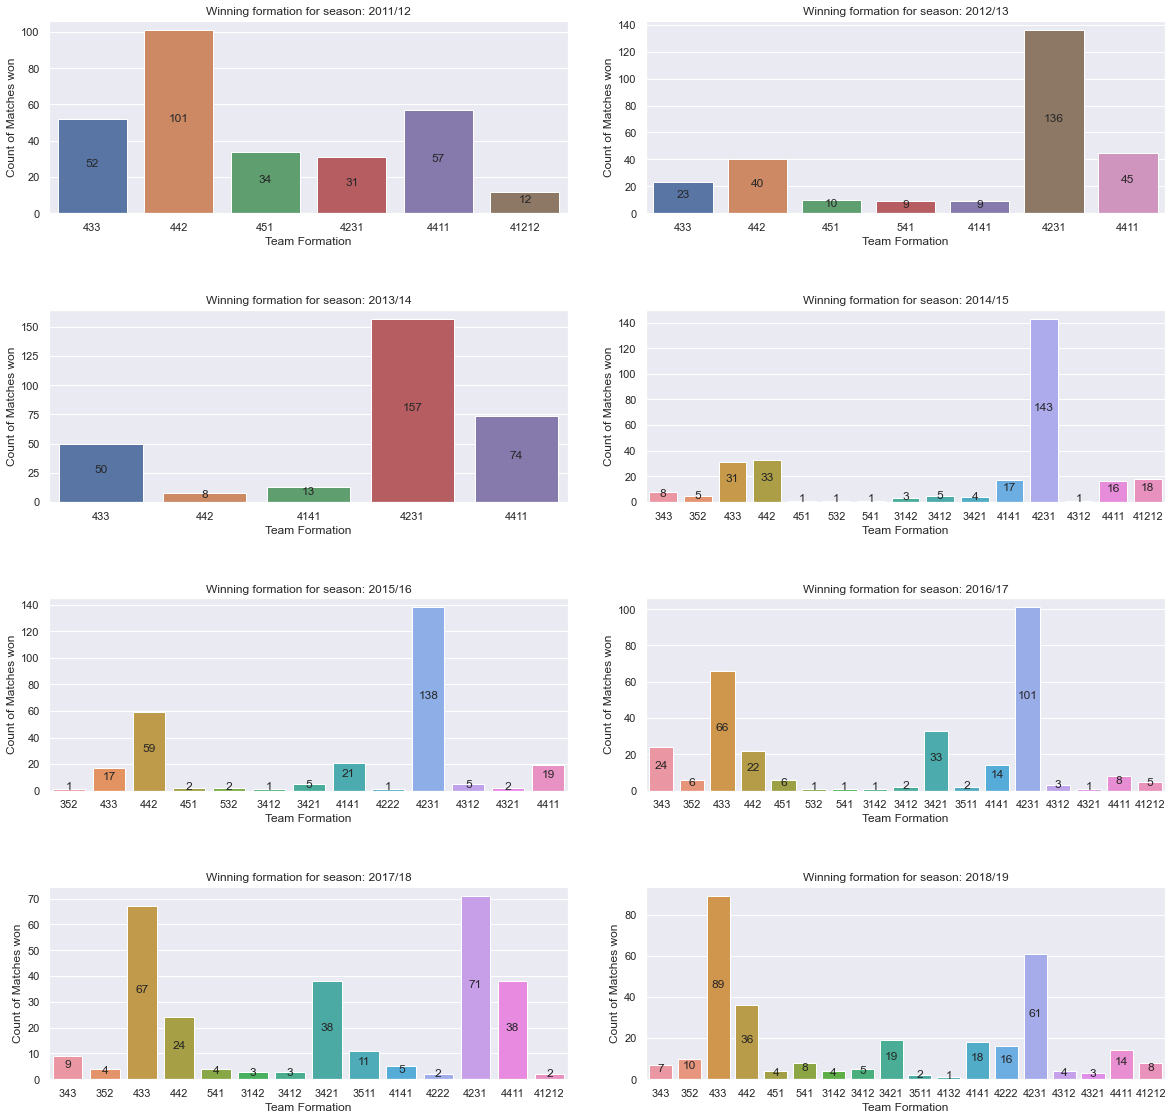

In [33]:

fig, axes = plt.subplots(ncols=2, nrows=4,figsize=(20, 15))
i1=0 
j1=0
for season in seasons:
    df_t88= df_t8[df_t8['seasonlabel']==season]
    df_t888 = df_t88.groupby(['winformation'])['gameweeknum'].count().reset_index()
    df_t888 = df_t888.rename(columns={"gameweeknum":"CountofMatch"})
    df_t888 = df_t888.sort_values('CountofMatch', ascending=True)
    ax1=sns.barplot(x='winformation', y='CountofMatch', data=df_t888,ax=axes[i1][j1])
    ax1.set_title('Winning formation for season: '+season)
    ax1.set(xlabel='Team Formation', ylabel='Count of Matches won')
    #for i in range(df_t888.shape[0]):
        #plt.text(df_t888['winformation'].iloc[i],df_t888['CountofMatch'].iloc[i] ,str(df_t888['CountofMatch'].iloc[i]),fontsize=8)     
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    j1=j1+1
    if (j1==2):
        j1=0
        i1=i1+1 
    for p in ax1.patches:
        width = p.get_width()
        ax1.text(p.get_x()+p.get_width()/2. ,p.get_height()/2,'{:.0f}'.format(round(p.get_height(),0)), ha="center")        
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.15)
plt.show()

** 8.5 Analysis of winning formation for Top5 for all the seasons **

In [34]:
top_team_all_season = df_team_summary_all_season[df_team_summary_all_season['SeasonsRank'].isin([1,2,3,4,5])]['team'].unique()
print(top_team_all_season)
top_formations = []
for season in seasons:
    df_t9= df_t8[df_t8['seasonlabel']==season]
    df_t99 = df_t9.groupby(['winformation'])['gameweeknum'].count().reset_index()
    df_t99 = df_t99.rename(columns={"gameweeknum":"CountofMatch"})
    df_t99 = df_t99.sort_values('CountofMatch', ascending=False) 
    #print(df_t99)
    tmp = list(df_t99['winformation'].head(4))
    #print(tmp)
    top_formations=top_formations+tmp
top_formations = list(set(top_formations))
print(top_formations) 

['Manchester City' 'Manchester United' 'Arsenal' 'Tottenham Hotspur'
 'Newcastle United' 'Chelsea' 'Liverpool' 'Everton' 'Leicester City']
[451, 4231, 4141, 433, 343, 442, 4411, 41212, 3421]


In [35]:
#Leicenster city & Newcastle United was not part of all season
top_team_all_season = ['Manchester City', 'Manchester United', 'Arsenal' ,'Tottenham Hotspur', 'Chelsea' ,'Liverpool' ,'Everton']
analysis_seasons = ['2016/17','2017/18','2018/19']
def get_team_stat_formation (d1,t1,f1):
    d2h=d1 [d1['team_h']==t1]
    d2a=d1 [d1['team_a']==t1]
    d2hf = d2h[d2h['formation_h']==f1]
    d2af = d2a[d2a['formation_a']==f1]
    tot_gam_form= d2hf['gameid'].count()+d2af['gameid'].count()
    tot_gam_win = d2hf[d2hf['matchoutcome']=='H']['gameid'].count()+d2af[d2af['matchoutcome']=='A']['gameid'].count()
    if (tot_gam_form > 0):
        win_pct = round((tot_gam_win/tot_gam_form)*100,1)
    else:
        win_pct = 0
    ret_str = str(win_pct)+'% ('+str(tot_gam_form)+')'
    return ret_str
col_list =['team','seasonlabel','SeasonsRank','WinForm-Season'] + top_formations
tot_rows = (len(top_team_all_season)*len(analysis_seasons))
df_team_formation_stat = pd.DataFrame(index=np.arange(tot_rows), columns=col_list)
i=0
for season in analysis_seasons:
    d_t10  = df_var_by[df_var_by['seasonlabel']==season]
    df_t108 = df_t8[df_t8['seasonlabel']==season]
    d_t108w = df_t108.groupby(['winformation'])['gameweeknum'].count().reset_index()
    t10widx = d_t108w['gameweeknum'].idxmax()
    seasonwinform2 = d_t108w['winformation'].values[t10widx]
    #print('seasonwinform',seasonwinform2)
    #print('season',season)
    for teamy in top_team_all_season:
        y=0
        #print('teamy',teamy)
        seasonr = df_team_summary_all_season[(df_team_summary_all_season['seasonlabel']==season) & (df_team_summary_all_season['team']==teamy)]['SeasonsRank'].values[0]
        df_team_formation_stat.iloc[i,y] = teamy
        df_team_formation_stat.iloc[i,y+1] = season
        df_team_formation_stat.iloc[i,y+2] = seasonr
        df_team_formation_stat.iloc[i,y+3] = seasonwinform2
        for formt in top_formations:
            t_st_form = get_team_stat_formation(d_t10,teamy,formt)
            df_team_formation_stat.iloc[i,y+4] = t_st_form
            #print ('value:'+ str(df_team_formation_stat.iloc[i,y+2]))
            y = y+1
        i=i+1
    #print(t_st_form)
df_team_formation_stat=df_team_formation_stat.sort_values(['team','seasonlabel'], ascending=[True,True]).reset_index(drop=True)    
df_team_formation_stat.head(tot_rows)

,team,seasonlabel,SeasonsRank,WinForm-Season,451,4231,4141,433,343,442,4411,41212,3421
0,Arsenal,2016/17,5,4231,0% (0),53.3% (30),0% (0),0% (0),0% (0),0% (0),0% (0),0% (0),87.5% (8)
1,Arsenal,2017/18,6,4231,0% (0),50.0% (8),100.0% (1),44.4% (9),0% (0),0% (0),0% (0),0% (0),50.0% (20)
2,Arsenal,2018/19,5,433,0% (0),52.9% (17),0% (0),0% (0),66.7% (3),33.3% (3),0% (0),50.0% (2),57.1% (7)
3,Chelsea,2016/17,1,4231,0% (0),0.0% (1),60.0% (5),0% (0),86.4% (22),0% (0),0% (0),0% (0),88.9% (9)
4,Chelsea,2017/18,5,4231,0% (0),0% (0),0% (0),0% (0),75.0% (4),0% (0),0% (0),0% (0),50.0% (20)
5,Chelsea,2018/19,3,433,0% (0),0% (0),0% (0),55.3% (38),0% (0),0% (0),0% (0),0% (0),0% (0)
6,Everton,2016/17,7,4231,0% (0),46.7% (15),0% (0),50.0% (12),0.0% (1),0.0% (1),0% (0),0% (0),66.7% (3)
7,Everton,2017/18,8,4231,0% (0),42.9% (14),66.7% (3),44.4% (9),0.0% (1),0.0% (2),0.0% (1),0% (0),25.0% (4)
8,Everton,2018/19,8,433,0% (0),43.3% (30),50.0% (2),0% (0),0% (0),0% (0),0.0% (3),0% (0),50.0% (2)
9,Liverpool,2016/17,4,4231,0% (0),0% (0),0% (0),54.3% (35),0% (0),0% (0),0% (0),100.0% (2),0% (0)


** 9 Comeback analysis by season and team ** 

In [36]:
def get_comback_team(df1):
    GD = (df1['first_half_goals_h']-df1['first_half_goals_a'])
    if (df1['matchoutcome']=='H'):
        return df1['team_h']
    elif (df1['matchoutcome']=='A'):
        return df1['team_a']
    elif (((df1['matchoutcome']=='D') & (GD > 0 ))):
        return df1['team_a']
    elif (((df1['matchoutcome']=='D') & (GD <0))):
        return df1['team_h']
df_match_turnaround = df_completeset_converted [(((df_completeset_converted['matchoutcome'].isin(['H','D'])) & ((df_completeset_converted['first_half_goals_a']-df_completeset_converted['first_half_goals_h'])>0)) | ((df_completeset_converted['matchoutcome'].isin(['A','D'])) & ((df_completeset_converted['first_half_goals_h']-df_completeset_converted['first_half_goals_a'])>0)))] 
df_match_turnaround_s= df_match_turnaround[['gameid','matchoutcome','seasonlabel','team_h','team_a','score_h','score_a','first_half_goals_h','first_half_goals_a']]
#df_match_turnaround_s['ComebackTeam'] = np.where((((df_match_turnaround_s['first_half_goals_a']-df_match_turnaround_s['first_half_goals_h'])>0) & (df_completeset_converted['matchoutcome'].isin(['H','D']))),df_match_turnaround_s['team_h'],df_match_turnaround_s['team_h'])
df_match_turnaround_s['ComebackTeam'] = df_match_turnaround_s.apply(get_comback_team,axis=1) 
df_match_turnaround_s1 = df_match_turnaround_s.groupby('seasonlabel')['gameid'].count()
print('-----Number of Comeback games-----')
df_match_turnaround_s1

-----Number of Comeback games-----


C:\Users\deept\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


seasonlabel
2011/12    49
2012/13    62
2013/14    51
2014/15    41
2015/16    53
2016/17    46
2017/18    50
2018/19    46
Name: gameid, dtype: int64

In [37]:
print('-----Top 5 Comeback Teams for season-----')

-----Top 5 Comeback Teams for season-----


In [38]:
df_match_turnaround_s2 = df_match_turnaround_s.groupby(['seasonlabel','ComebackTeam'])['gameid'].count().reset_index()
df_match_turnaround_s2=df_match_turnaround_s2.sort_values(['seasonlabel','gameid'], ascending=[True,False])
df_match_turnaround_s2 = df_match_turnaround_s2.rename(columns={"gameid":"Comebacks"})
for season in seasons:
    print('Season:'+season)
    print(df_match_turnaround_s2[df_match_turnaround_s2['seasonlabel']==season].head(5))

Season:2011/12
   seasonlabel             ComebackTeam  Comebacks
12     2011/12               Stoke City          7
18     2011/12  Wolverhampton Wanderers          5
2      2011/12         Blackburn Rovers          4
5      2011/12                   Fulham          4
10     2011/12             Norwich City          4
Season:2012/13
   seasonlabel       ComebackTeam  Comebacks
24     2012/13          Liverpool          6
35     2012/13  Tottenham Hotspur          6
22     2012/13            Everton          5
30     2012/13            Reading          5
31     2012/13        Southampton          4
Season:2013/14
   seasonlabel          ComebackTeam  Comebacks
55     2013/14  West Bromwich Albion          8
41     2013/14          Cardiff City          5
39     2013/14               Arsenal          4
48     2013/14     Manchester United          4
53     2013/14          Swansea City          4
Season:2014/15
   seasonlabel       ComebackTeam  Comebacks
58     2014/15            Burnl